<a href="https://colab.research.google.com/github/miqbatalla/BS/blob/main/fastaiBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 6.2 MB/s 
     |████████████████████████████████| 186 kB 45.5 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 1.2 MB 33.4 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 51 kB 308 kB/s 


In [3]:
import fastbook
fastbook.setup_book() 
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *

Mounted at /content/gdrive


Images from Bing Image Search + Azure

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY','b09b371fa54c4b44a423452ce0cf2779')

Search images from specific terms

In [5]:
image_types = ['Afador','Akita']
path = Path('Dogs')

In [6]:
if not path.exists():
  path.mkdir()
  for o in image_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    results = search_images_bing(key,f'{o} dog')
    download_images(dest, urls = results.attrgot('contentUrl'))

Check for fails

In [7]:
fns = get_image_files(path)
fns

(#258) [Path('Dogs/Afador/00000044.jpg'),Path('Dogs/Afador/00000120.jpg'),Path('Dogs/Afador/00000094.png'),Path('Dogs/Afador/00000127.jpg'),Path('Dogs/Afador/00000018.jpg'),Path('Dogs/Afador/00000041.jpg'),Path('Dogs/Afador/00000129.png'),Path('Dogs/Afador/00000008.jpg'),Path('Dogs/Afador/00000138.jpg'),Path('Dogs/Afador/00000144.png')...]

In [8]:
failed = verify_images(fns)
failed

(#5) [Path('Dogs/Afador/00000106.jpg'),Path('Dogs/Afador/00000084.jpg'),Path('Dogs/Afador/00000110.jpg'),Path('Dogs/Afador/00000087.jpg'),Path('Dogs/Akita/00000068.jpg')]

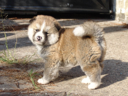

In [9]:
im = Image.open('Dogs/Akita/00000033.jpg')
im.to_thumb(128,128)

In [10]:
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

From Data to DataLoaders

There exists some factory methods to create standard data structures. When you have some data that doesn't fit those predefined methods, fastai is extremely flexible with his Data Block API. You can customize every stage of the creation of your DataLoader (The Data that will feed the model)

In [11]:
Images = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  get_items = get_image_files, #function that given a path, returns a list of all the images in that path
                  splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                  get_y = parent_label, #function that 
                  item_tfms = Resize(128))

In [12]:
dls = Images.dataloaders(path)

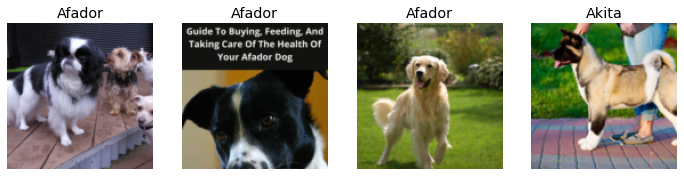

In [13]:
dls.valid.show_batch(max_n=4,nrows=1)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4) #modelo preentrenado - transfer learning

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.238508,0.568306,0.140000,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.557146,0.528586,0.160000,00:10
1,0.418138,0.493563,0.140000,00:10
2,0.306891,0.567350,0.140000,00:10
3,0.237925,0.569724,0.140000,00:09


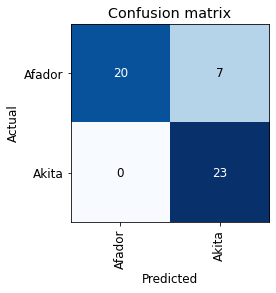

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

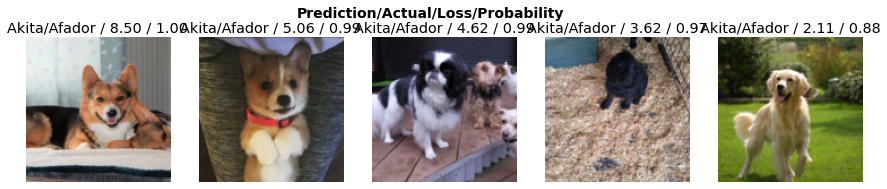

In [20]:
interp.plot_top_losses(5,nrows=1)

In [17]:
cleaner = ImageClassifierCleaner(learn)
cleaner

Export the model

In [28]:
learn.export('fastaiBS.pkl')

In [ ]:
ls

Dogs/  export.pkl  gdrive/  sample_data/


In [ ]:
learn_inf = load_learner('export.pkl')

In [ ]:
learn_inf.predict('Dogs/Akita/00000033.jpg')

('Akita', tensor(1), tensor([0.0041, 0.9959]))

In [ ]:
learn_inf.dls.vocab

['Afador', 'Akita']

Create Notebook App

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
btn_upload = SimpleNamespace(data = ['Dogs/Akita/00000033.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Akita; Probability: 0.9959')

In [ ]:
btn_run = widgets.Button(description = 'Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [31]:
pip install voila

In [32]:
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
